## 1. Occurences of ER treatment types

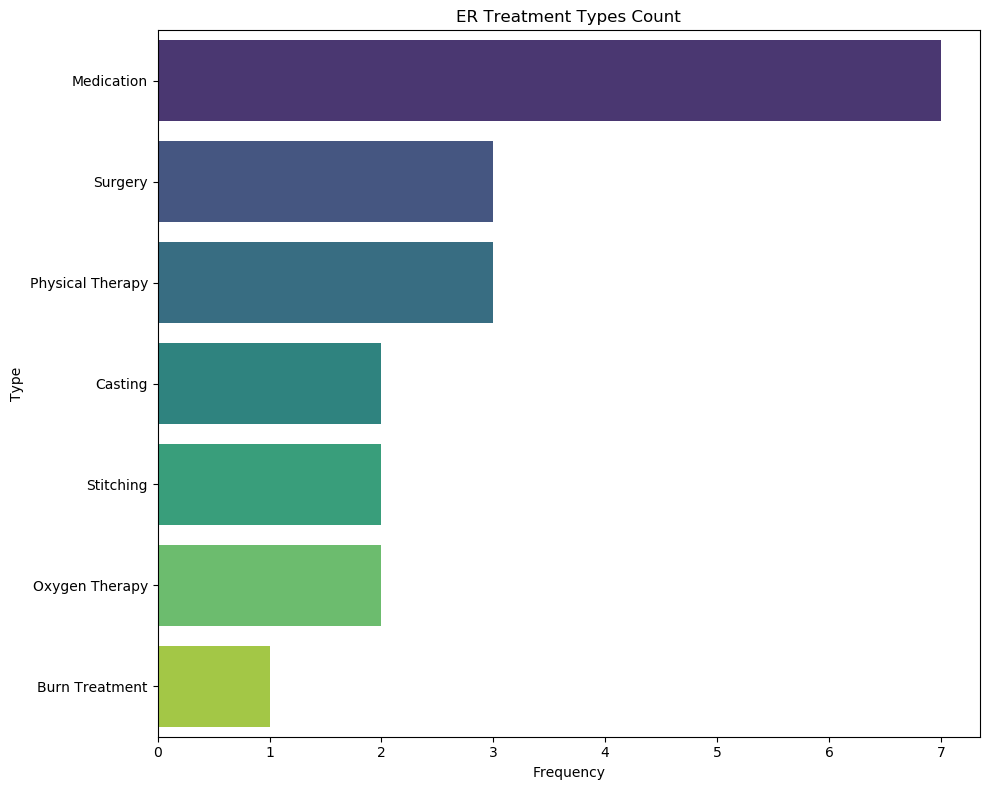

In [5]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Connect to the SQL database
try:
    connection = mysql.connector.connect(
        host='127.0.0.1',
        database='hers',
        user='root',
        password='291811',
        auth_plugin='mysql_native_password'
    )
    # Step 2: Query the database and create a DataFrame
    if connection.is_connected():
        query = "SELECT type, COUNT(*) as count FROM `er treatment` GROUP BY type ORDER BY count DESC"
        df = pd.read_sql(query, connection)

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if connection.is_connected():
        connection.close()

# Step 3: Visualize
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='type', data=df, palette='viridis')
plt.title('ER Treatment Types Count')
plt.xlabel('Frequency')
plt.ylabel('Type')
plt.tight_layout() 
plt.show()

## 2. Visualize proportional breakdown of physicians across various specialties

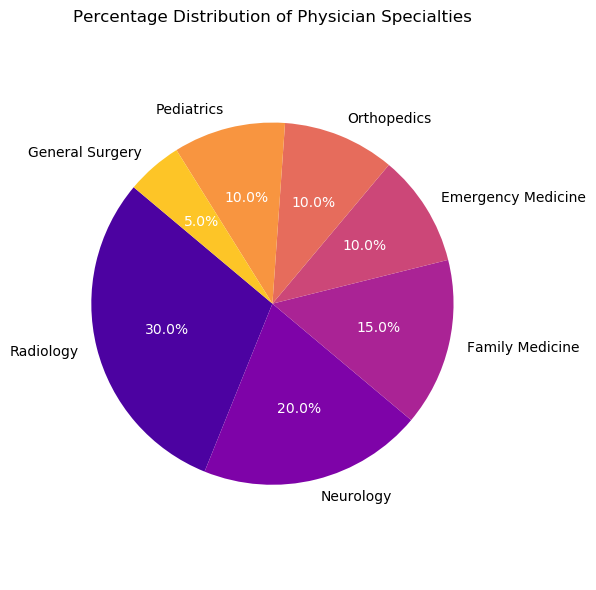

MySQL connection is closed


In [1]:

try:
    connection = mysql.connector.connect(
        host='127.0.0.1',
        database='hers',
        user='root',
        password='291811',
        auth_plugin='mysql_native_password'
    )
    
    if connection.is_connected():
        # Fetching data for all specialties
        sql_select_Query = """
        SELECT Specialty, COUNT(*) as count 
        FROM `er physician`
        GROUP BY Specialty
        ORDER BY count DESC
        """
        df = pd.read_sql(sql_select_Query, connection)
        
       # Visualization - Calculating percentages and creating a pie chart
       # Custom autopct function to include color
        def custom_autopct(pct):
            return ('%1.1f%%' % pct) if pct > 0 else ''
        df['percentage'] = (df['count'] / df['count'].sum()) * 100  # Calculate percentages
        plt.figure(figsize=(6, 6))  
        pie_chart = plt.pie(df['percentage'], labels=df['Specialty'], autopct=custom_autopct, startangle=140, 
                    colors=sns.color_palette("plasma", len(df)))
        # Change the color of the autopct values to white
        for autotext in pie_chart[2]:
            autotext.set_color('white')
        plt.title('Percentage Distribution of Physician Specialties')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.tight_layout()  
        plt.show()

    
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        connection.close()
        print("MySQL connection is closed")


## 3. Visualize Frequency of Each Outcome in Disposition Decisions

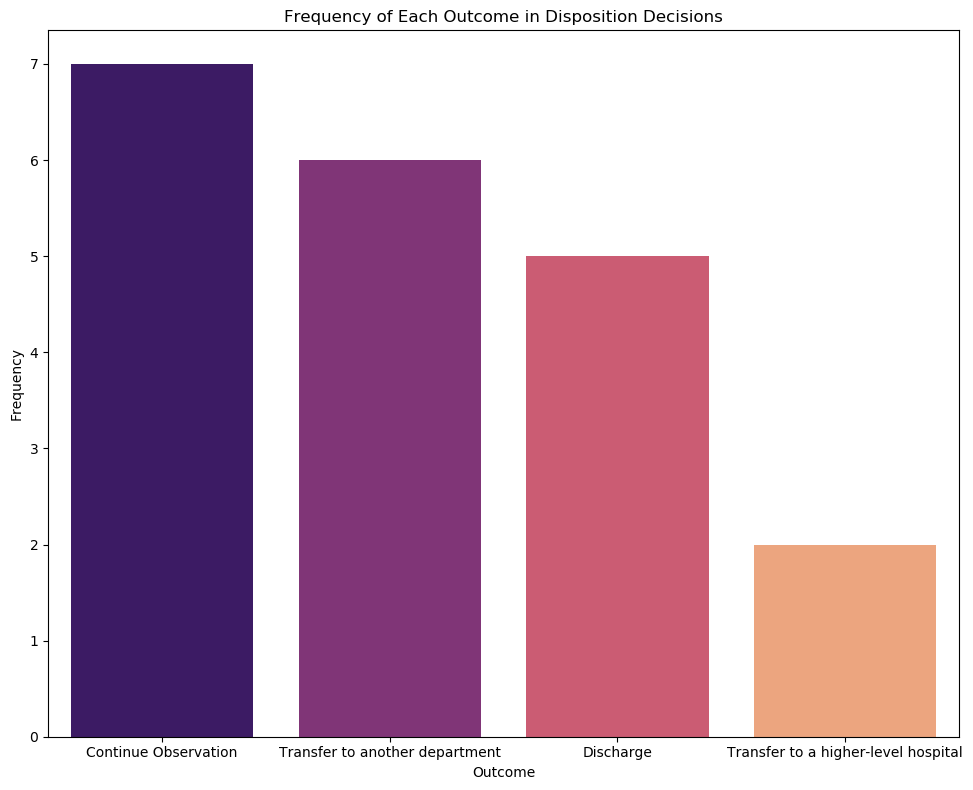

In [64]:
# Step 1: Connect to the SQL database
try:
    connection = mysql.connector.connect(
        host='127.0.0.1',
        database='hers',
        user='root',
        password='291811',
        auth_plugin='mysql_native_password'
    )
    # Step 2: Query the database and create a DataFrame
    if connection.is_connected():
        query = "SELECT outcome, COUNT(*) as count FROM `disposition decision` GROUP BY outcome ORDER BY count DESC"
        df = pd.read_sql(query, connection)

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if connection.is_connected():
        connection.close()

# Step 3: Visualize the data
plt.figure(figsize=(10, 8))
sns.barplot(x='outcome', y='count', data=df, palette='magma')
plt.title('Frequency of Each Outcome in Disposition Decisions')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to fit the figure and prevent clipping of labels
plt.show()
